In [1]:
import pandas as pd
import numpy as np

### Step 1: Importing Data

In [2]:
df= pd.read_csv('train.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,144035,-0.795465,1.035145,0.629094,1.060550,0.185512,0.442982,0.367739,0.629104,-0.215407,...,-0.224165,-0.406332,-0.113468,-0.519506,0.062945,-0.625920,0.305893,0.130054,35.80,0
1,57027,-2.335655,2.225380,-3.379450,2.178538,-3.568264,0.316814,-1.734948,1.449139,-1.980033,...,0.785540,0.297412,0.308536,-0.598416,-0.121850,-0.491018,0.701606,0.206966,444.17,1
2,75347,1.485941,-0.325035,-0.551499,-0.845371,-0.216371,-0.917921,-0.011792,-0.375973,-1.136155,...,0.145207,0.346199,-0.281322,-0.404634,0.909394,-0.034868,-0.030328,-0.004064,25.00,0
3,75424,-0.804963,0.712653,1.360827,-0.332024,1.302313,1.623387,0.551873,0.637665,-0.844825,...,0.219177,0.644723,-0.258438,-1.357390,0.469040,-0.272856,0.023010,-0.053357,18.95,0
4,102676,-5.552122,5.678134,-9.775528,8.416295,-4.409844,-1.506235,-6.899839,3.750443,-3.879793,...,1.128472,0.228484,0.286258,-0.536294,-0.104925,0.420919,-0.297557,-0.946184,119.74,1


### Step 2: Cleaning Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 31 columns):
Time      902 non-null int64
V1        902 non-null float64
V2        902 non-null float64
V3        902 non-null float64
V4        901 non-null float64
V5        901 non-null float64
V6        901 non-null float64
V7        901 non-null float64
V8        901 non-null float64
V9        902 non-null float64
V10       902 non-null float64
V11       902 non-null float64
V12       902 non-null float64
V13       902 non-null float64
V14       901 non-null float64
V15       901 non-null float64
V16       901 non-null float64
V17       901 non-null float64
V18       901 non-null float64
V19       901 non-null float64
V20       902 non-null float64
V21       902 non-null float64
V22       902 non-null float64
V23       902 non-null float64
V24       902 non-null float64
V25       902 non-null float64
V26       902 non-null float64
V27       902 non-null float64
V28       902 non-null float6

In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        1
V5        1
V6        1
V7        1
V8        1
V9        0
V10       0
V11       0
V12       0
V13       0
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df[df['V4'].isnull()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
900,11131,-1.426623,4.141986,-9.804103,NaN,NaN,NaN,NaN,NaN,-3.249516,...,1.865679,0.407809,0.605809,-0.769348,-1.746337,0.50204,1.977258,0.711607,1.0,1


In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().values.any()

False

### Step 3: Data Preprocessing

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,...,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,89579.985556,-2.302370,1.776772,-3.533859,2.210778,-1.613497,-0.699977,-2.703860,0.381013,-1.270022,...,0.366111,-0.005000,-0.031945,-0.038475,0.030377,0.025562,0.077531,0.036373,108.953633,0.500000
std,48739.857474,5.546627,3.672593,6.171931,3.174811,4.342731,1.890163,5.877914,4.853342,2.297901,...,2.702693,1.139523,1.196382,0.573055,0.661572,0.468758,0.989314,0.421468,308.928972,0.500278
min,406.000000,-30.552380,-8.402154,-31.103685,-4.401290,-29.730600,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.149923,-7.263482,-1.869290,0.000000,0.000000
25%,47249.750000,-2.825991,-0.195431,-5.068730,-0.105275,-1.775001,-1.587624,-2.992775,-0.178557,-2.301580,...,-0.162558,-0.543180,-0.226998,-0.379574,-0.301918,-0.295559,-0.059425,-0.053411,1.625000,0.000000
50%,81674.500000,-0.712196,0.896925,-1.456225,1.206713,-0.458894,-0.672049,-0.602134,0.150282,-0.680745,...,0.130469,-0.017277,-0.025929,0.016212,0.049648,-0.026232,0.046411,0.027474,18.970000,0.500000
75%,138944.250000,1.138937,2.777569,0.366721,4.173330,0.529846,0.035199,0.266629,0.944850,0.213191,...,0.651412,0.570253,0.194164,0.382373,0.393059,0.350455,0.419129,0.206210,99.990000,1.000000
max,172622.000000,2.369906,22.057729,3.225532,12.114672,11.095089,21.307738,31.527244,20.007208,4.762324,...,27.202839,8.361985,5.466230,3.569702,2.208209,1.884741,4.655054,3.503999,6454.740000,1.000000


In [11]:
df.groupby('Class').count()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,450,450,450,450,450,450,450,450,450,450,...,450,450,450,450,450,450,450,450,450,450
1,450,450,450,450,450,450,450,450,450,450,...,450,450,450,450,450,450,450,450,450,450


In [12]:
X_df = df.drop(columns=['Class'])
y_df = df['Class']

In [13]:
X_df.shape, y_df.shape

((900, 30), (900,))

In [65]:
X = np.array(X_df)
y = np.array(y_df).astype(float)

In [66]:
# #optional step
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scale.fit_transform(X)

array([[0.83400497, 0.90385325, 0.30982715, ..., 0.63509271, 0.37208942,
        0.00554631],
       [0.32877898, 0.85707065, 0.34890264, ..., 0.66829419, 0.38640329,
        0.068813  ],
       [0.43515701, 0.97314995, 0.26517236, ..., 0.60688275, 0.34712932,
        0.00387312],
       ...,
       [0.9008919 , 0.89642356, 0.37783653, ..., 0.66606746, 0.41061749,
        0.01468998],
       [0.67160426, 0.95684792, 0.31962279, ..., 0.66189093, 0.40663504,
        0.01007012],
       [0.43882102, 0.77186794, 0.39300561, ..., 0.6243462 , 0.47100491,
        0.015477  ]])

### Step 4: Splitting Data into Train and Valid Set

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.05, shuffle=True)

In [69]:
X_train.shape , X_valid.shape, y_train.shape, y_valid.shape

((855, 30), (45, 30), (855,), (45,))

### Step 5: Modelling Data

In [70]:
import tensorflow as tf

In [80]:
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.25)


In [104]:
def model(x):
    mu = 0
    sigma = 0.05
    
    
    
    weights_1 = tf.Variable(tf.truncated_normal(shape=(30,1000) ,mean = mu, stddev= sigma))
    bias_1 = tf.Variable(tf.zeros(1000))
    product_1 = tf.matmul(x, weights_1 ) + bias_1
    
    layer_1 = tf.nn.relu(product_1)
    
    weights_2 = tf.Variable(tf.truncated_normal(shape=(1000,500) , mean= mu, stddev=sigma))
    bias_2 = tf.Variable(tf.zeros(500))
    product_2 = tf.matmul(layer_1 , weights_2  ) + bias_2 

    layer_2 = tf.nn.relu(product_2)

    weights_3 = tf.Variable(tf.truncated_normal(shape=(500,50) , mean= mu, stddev=sigma))
    bias_3 = tf.Variable(tf.zeros(50))
    product_3 = tf.matmul( layer_2 , weights_3  ) + bias_3
    
    layer_3= tf.nn.relu(product_3)
    
    weights_4 = tf.Variable(tf.truncated_normal(shape=(50,1) , mean= mu, stddev=sigma))
    bias_4 = tf.Variable(tf.zeros(1))
    product_4 = tf.matmul( layer_3 , weights_4  ) + bias_4

    
    return product_4
    

In [140]:
def model_xe(x):
    mu = 0
    sigma = 0.05
    
    
    initializer = tf.contrib.layers.xavier_initializer()
    weights_1 = tf.Variable(initializer(shape=(1000,30)))
    bias_1 = tf.Variable(initializer(shape=(1000,1)))
    product_1 = tf.matmul(weights_1 , tf.transpose(x)) + bias_1
    
    layer_1 = tf.nn.relu(product_1)
    
    weights_2 = tf.Variable(initializer(shape=(500,1000)))
    bias_2 = tf.Variable(initializer((500,1)))
    product_2 = tf.matmul(weights_2 , tf.transpose(layer_1) ) + bias_2 

    layer_2 = tf.nn.relu(product_2)

    weights_3 = tf.Variable(initializer(shape=(50,500) ))
    bias_3 = tf.Variable(initializer((50,1)))
    product_3 = tf.matmul(  weights_3 , tf.transpose(layer_2)  ) + bias_3
    
    layer_3= tf.nn.relu(product_3)
    
    weights_4 = tf.Variable(initializer(shape=(1,50) ))
    bias_4 = tf.Variable(initializer((1)))
    product_4 = tf.matmul(  weights_4 , tf.transpose(layer_3)  ) + bias_4

    
    return product_4
    

In [141]:
if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()

In [142]:
# forward propagation 
# model(x)

learn_rate = 0.001

x_pass = tf.placeholder(dtype=tf.float32,  shape = (None, 30))
y_pass = tf.placeholder(dtype = tf.float32 , shape = (None,None))

forward_prop =  model_xe(x_pass)

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = y_pass, logits=forward_prop)

total_loss = tf.reduce_mean(loss)

optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)

backward_prop = optimizer.minimize(total_loss)

ValueError: Dimensions must be equal, but are 500 and 1000 for 'MatMul_39' (op: 'MatMul') with input shapes: [50,500], [1000,500].

In [119]:
epochs =100

In [120]:
correct_prediction = tf.equal(tf.cast(tf.greater_equal(forward_prop,0.5), tf.float32) , y_pass)
#correct_prediction = tf.equal(tf.argmax(forward_prop, 1), tf.argmax(y_pass, 1))
accuracy_operation =  tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [121]:
with tf.Session(config=tf.ConfigProto(gpu_options=gpu_options)) as sess:
    sess.run(tf.global_variables_initializer())
    print('Training...')
    for i in range(epochs):
        log = sess.run(tf.cast(tf.greater_equal(loss,0.5), tf.float32) , feed_dict={x_pass: X_train , y_pass: y_train.reshape(y_train.shape[0],1)})
        #print(log, feed_dict={x_pass: X_train , y_pass: y_train.reshape(y_train.shape[0],1)}))
        #print(log.shape)
        #print(sess.run(tf.equal(log , y_train.reshape(y_train.shape[0],1))))
        sess.run( backward_prop , feed_dict={x_pass: X_train , y_pass: y_train.reshape(y_train.shape[0],1)})
        train_loss = sess.run(total_loss, feed_dict={x_pass:X_train , y_pass: y_train.reshape(y_train.shape[0],1)})
        validation_loss = sess.run(total_loss, feed_dict={x_pass:X_valid , y_pass: y_valid.reshape(y_valid.shape[0],1)})
        accuracy = sess.run(accuracy_operation, feed_dict={x_pass:X_valid, y_pass:y_valid.reshape(y_valid.shape[0],1)})
        print(train_loss ,"  ",validation_loss,"  ", accuracy)
    

Training...
8318.164    6830.824    0.5777778
6531.4614    5363.8574    0.5777778
3250.161    2669.3752    0.5777778
433.79108    459.03455    0.42222223
965.86786    1022.9171    0.42222223
172.87743    142.74036    0.5777778
110.68726    116.47221    0.42222223
743.38727    610.8688    0.6
608.51587    500.1831    0.6
305.60605    322.99307    0.42222223
184.90654    195.00919    0.42222223
689.66064    566.97424    0.6
784.0902    644.49805    0.6
253.03377    208.65382    0.5777778
903.95514    957.3129    0.42222223
1176.4436    1246.0703    0.42222223
683.6728    723.6954    0.42222223
379.48407    312.4609    0.5777778
728.3209    598.775    0.6
543.2375    446.88797    0.6
115.90699    121.71739    0.42222223
127.64987    134.13719    0.42222223
408.5714    336.4863    0.5777778
421.62375    347.23157    0.5777778
6.8918204    6.0302496    0.42222223
116.964455    97.25113    0.5777778
225.94951    238.14746    0.42222223
18.803715    15.963983    0.62222224
207.55307    218.58

In [88]:
import keras
from keras.layers import BatchNormalization
from keras.layers.core import Flatten,Dense,Dropout, Activation, Lambda
from keras.models import Model, Sequential
from keras.optimizers import Adam,SGD
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [90]:
model = Sequential()
#model.add(Lambda(lambda x: x , input_shape = (24)))
#model.add(Lambda(lambda x: x+0.1 , input_shape = (64,64,3)))
#model.add(Flatten())
#model.add(BatchNormalization(input_shape=(30,)))
model.add(Dense(1000, input_shape=(30,)))
model.add(Activation('relu'))


model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(500))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(50))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(optimizer = Adam(lr=0.00001) , loss = 'binary_crossentropy', metrics=['accuracy'])

In [91]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1000)              31000     
_________________________________________________________________
activation_1 (Activation)    (None, 1000)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               500500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                25050     
_________________________________________________________________
activation_3 (Activation)    (None, 50)                0         
__________

In [92]:
model.fit(X_train, y_train, epochs=30, verbose =1, validation_data=(X_valid, y_valid))

Train on 855 samples, validate on 45 samples
Epoch 1/30
855/855 [==============================] - 1s 980us/step - loss: 8.1428 - acc: 0.4947 - val_loss: 6.8054 - val_acc: 0.5778
Epoch 2/30
855/855 [==============================] - 0s 524us/step - loss: 8.1365 - acc: 0.4947 - val_loss: 6.8054 - val_acc: 0.5778
Epoch 3/30
855/855 [==============================] - 1s 655us/step - loss: 8.1409 - acc: 0.4936 - val_loss: 6.7822 - val_acc: 0.5778
Epoch 4/30
855/855 [==============================] - 0s 521us/step - loss: 8.1883 - acc: 0.4912 - val_loss: 6.7198 - val_acc: 0.5778
Epoch 5/30
855/855 [==============================] - 0s 550us/step - loss: 8.0873 - acc: 0.4959 - val_loss: 6.6297 - val_acc: 0.5778
Epoch 6/30
855/855 [==============================] - 0s 500us/step - loss: 8.0773 - acc: 0.4982 - val_loss: 6.8054 - val_acc: 0.5778
Epoch 7/30
855/855 [==============================] - 0s 545us/step - loss: 8.1122 - acc: 0.4959 - val_loss: 6.8054 - val_acc: 0.5778
Epoch 8/30
855/85

In [22]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

<Figure size 640x480 with 1 Axes>

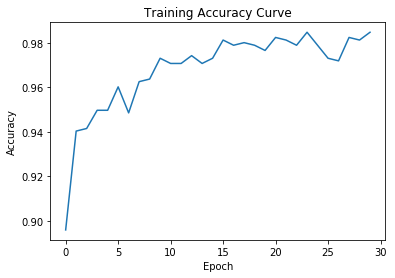

In [23]:
plt.plot(model.history.history['acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Curve')
plt.show()

### Step 6: Inference on Test Set

In [ ]:
test_df = pd.read_csv('./test.csv')

In [ ]:
test_df.head()

In [ ]:
y_test = np.array(test_df['Class'])

In [ ]:
x_test =  np.array(test_df.drop(columns='Class'))

In [ ]:
x_test.shape, y_test.shape

### Step 7: Checking Metrics for Performance

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred = (y_pred >= 0.5).astype(int)

In [ ]:
y_pred[0:5]

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
print(confusion_matrix(y_test,y_pred))